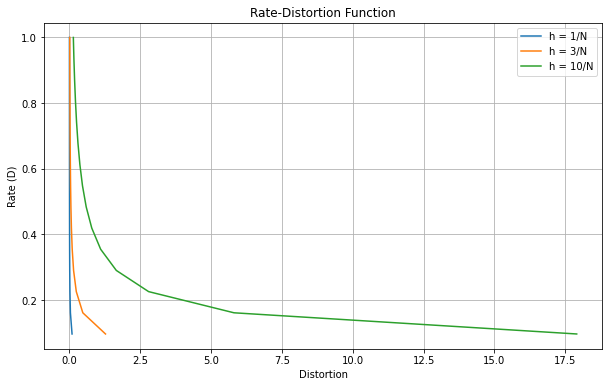

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import dblquad

#define probability density function (PDF) for X
def pdf_X(x):
    return np.exp(-x**2 / 2) / np.sqrt(2 * np.pi)

#define PDF for Y
def pdf_Y(y):
    return np.exp(-y**2 / 2) / np.sqrt(2 * np.pi)

#joint PDF for X and Y (since X and Y are independent)
def pdf_XY(x, y):
    return pdf_X(x) * pdf_Y(y)

#rate function in terms of N and h
def rate(N, h):
    return np.log2(N) / (h**2)

#distortion function in terms of N and h
def distortion(N, h):
    #function to calculate quantization thresholds for given N and h
    def quantization_thresholds(N, h):
        return [(2*k - N - 1) * h for k in range(1, N + 2)]

    #function to calculate quantized values for given N and h
    def quantized_values(N, h):
        return [(2*k - N - 2) * h for k in range(1, N + 2)]

    #obtain quantization thresholds and values
    thresholds_x = quantization_thresholds(N, h)
    values_x = quantized_values(N, h)

    #initialize distortion sum
    distortion_sum = 0

    #calculate distortion using numerical integration (dblquad)
    for i in range(N):
        lower_x, upper_x = thresholds_x[i], thresholds_x[i + 1]

        mid_x = (values_x[i] + values_x[i + 1]) / 2

        #use dblquad for numerical integration
        distortion_sum += dblquad(lambda x, y: pdf_XY(x, y) * ((x - mid_x)**2),
                                  -np.inf, np.inf, lambda x: lower_x, lambda x: upper_x)[0]

    return distortion_sum

#define N values
N_values = list(range(3, 32, 2))

# Define h values (ratios, small values, large values)
h_ratios = [1/N for N in N_values]
h_values = [3/N for N in N_values]
h_large_values = [10/N for N in N_values]

#calculate distortion for each combination of N and h
distortion_values = np.zeros((len(N_values), 3))

for i, N in enumerate(N_values):
    distortion_values[i, 0] = distortion(N, h_ratios[i])
    distortion_values[i, 1] = distortion(N, h_values[i])
    distortion_values[i, 2] = distortion(N, h_large_values[i])

#transform N into R
R_values = np.array(N_values) / max(N_values)

#plot the rate-distortion function
plt.figure(figsize=(10, 6))

plt.plot(distortion_values[:, 0], R_values, label='h = 1/N')
plt.plot(distortion_values[:, 1], R_values, label='h = 3/N')
plt.plot(distortion_values[:, 2], R_values, label='h = 10/N')

plt.title('Rate-Distortion Function')
plt.xlabel('Distortion')
plt.ylabel('Rate (D)')
plt.legend()
plt.grid(True)
plt.show()
